# geoJSON to geohash functions for geohashlib


In [1]:
import os
os.chdir('../geohash-shape/geohashshape')

from geojson import Polygon
import geohash_shape
import unittest
import json
import geohash
import matplotlib.pyplot as plt
%matplotlib inline

from geohash_shape import neighbor

from shapely.geometry.base import BaseGeometry
from shapely.geometry import box, mapping, shape
from geohashshape import geohash_shape

Below are a couple functions that can be found in geohash-shape's "tests" folder.

In [2]:
def load_from_JSON(json_string):
    return json.loads(json_string, cls=ShapelyDecoder)

class ShapelyDecoder(json.JSONDecoder):
    def decode(self, json_string):

        def shapely_object_hook(obj):
            if 'coordinates' in obj and 'type' in obj:
                return shape(obj)
            return obj

        return json.loads(json_string, object_hook=shapely_object_hook)

## David's Example should be dr5rustf

A slight nuance to this is that the coordinates provided were in reverse order of what this function takes. In future cases, it should [longitude,latitude] as opposed to [latitude,longitude].

In [3]:
david_example = """{"type":"Polygon","coordinates":[[[-73.9741,40.7626], 
    [-73.9736,40.7626], [-73.9737,40.7622], [-73.9740,40.7622]]]}"""


davids_polygon = load_from_JSON(david_example)
print "Geohash is:"
print geohash_shape(davids_polygon, 8, 'inside')

Geohash is:
['dr5rustf']


### The 8 surrounding geohashes

In [4]:
def neighbors(geo_hash):
    directions = [[-1,-1],[0,-1],[1,-1],[-1,0],[1,0],[-1,1],[0,1],[1,1]]
    surrounding_geohashes = [neighbor(geo_hash,direc) for direc in directions]
    return surrounding_geohashes

neighbors('dr5rustf')

['dr5rust9',
 'dr5rustd',
 'dr5ruste',
 'dr5rustc',
 'dr5rustg',
 'dr5rusw1',
 'dr5rusw4',
 'dr5rusw5']

### Let's validate the neighbor function

![img](/images/neighbor_example.png)

Looks like it works!

Trying David's neighbors example.

In [13]:
neighbors('dr5ruddr')

['dr5ruddn',
 'dr5ruddp',
 'dr5rudf0',
 'dr5ruddq',
 'dr5rudf2',
 'dr5ruddw',
 'dr5ruddx',
 'dr5rudf8']

![img](/images/david_neighbors.png)

There seems to be some disagreement?

### Create an example set of geohashes

In [5]:
example_set = geohash_shape(davids_polygon, 9, 'inside')

Function that turns geohashes into coordinates for the Polygon object

In [6]:
def to_coordinates(geohashes):
    geohashes = [geohash.decode(h) for h in geohashes]
    return geohashes

Below is what the set currently looks like

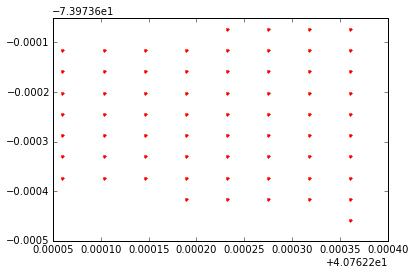

In [7]:
x = [xx for (xx,yy) in to_coordinates(example_set)]
y = [yy for (xx,yy) in to_coordinates(example_set)]
plt.plot(x,y,'r.')

Returns corners only

In [8]:
def corners(geohashes):
    vertices = []
    for geo in geohashes:
        if (neighbor(geo,[1,0]) in geohashes) and (neighbor(geo,[-1,0]) in geohashes):
            pass
        elif (neighbor(geo,[0,-1]) in geohashes) and (neighbor(geo,[0,1]) in geohashes):
            pass
        else:
            vertices.append(geo)
    return vertices
            

New coordinates left to create the new polygon

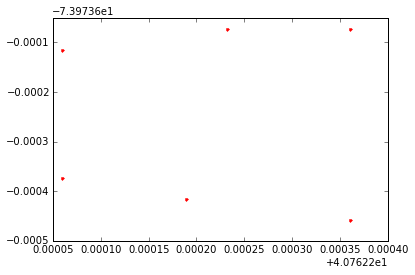

In [9]:
vx = [xx for (xx,yy) in to_coordinates(corners(example_set))]
vy = [yy for (xx,yy) in to_coordinates(corners(example_set))]
plt.plot(vx,vy,'r.')

### The function below turns the corner geohashes into a Polygon

In [10]:
def return_shape(vert):
    points = to_coordinates(vert)
    return Polygon(points)

return_shape(corners(example_set))

{"coordinates": [[40.76225996017456, -73.9739727973938], [40.76225996017456, -73.97371530532837], [40.762388706207275, -73.97401571273804], [40.762431621551514, -73.97367238998413], [40.76256036758423, -73.97405862808228], [40.76256036758423, -73.97367238998413]], "type": "Polygon"}

One function to go from a set of geohashes to a shape

In [11]:
def hash2poly(geohashes):
    corners_ = corners(geohashes)
    shape_ = return_shape(corners_)
    return shape_

In [12]:
hash2poly(example_set)

{"coordinates": [[40.76225996017456, -73.9739727973938], [40.76225996017456, -73.97371530532837], [40.762388706207275, -73.97401571273804], [40.762431621551514, -73.97367238998413], [40.76256036758423, -73.97405862808228], [40.76256036758423, -73.97367238998413]], "type": "Polygon"}